In [25]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from category_encoders import CountEncoder


data = pd.read_csv('AB_NYC_2019.csv')

data.head()
drop = ['id', 'name', 'host_id', 'host_name', 'last_review']
data = data.drop(drop,axis=1)

data.head()

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

#number_of_reviews reviews_per_month 0.549868

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


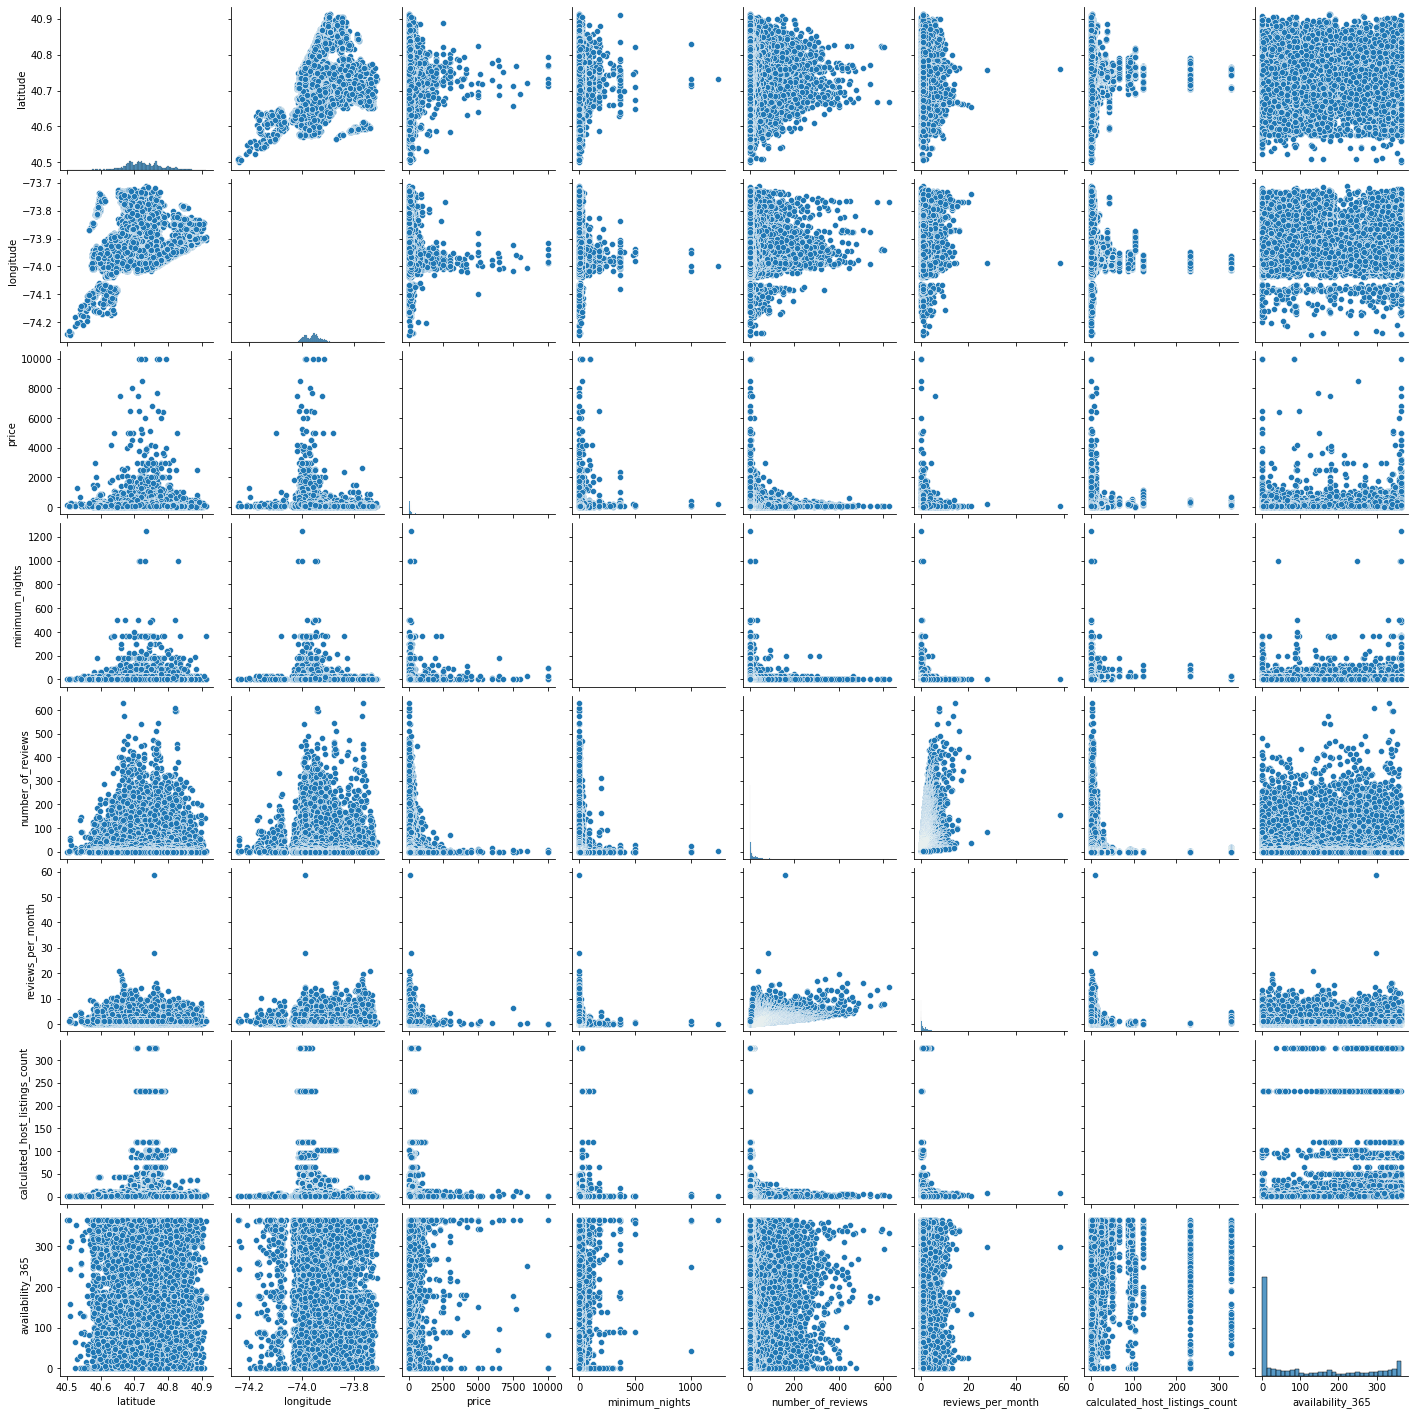

In [11]:
sns.pairplot(data)

In [12]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [16]:
!pip install category_encoders

In [23]:
from category_encoders import OrdinalEncoder, OneHotEncoder
enc = OneHotEncoder()
#data_new = enc.fit_transform(data[['neighbourhood_group','room_type']]).head()

#data_new.head()


data_enc = data.drop(['neighbourhood_group','room_type'], axis = 1).join(enc.fit_transform(data[['neighbourhood_group','room_type']], axis = 0))
data_enc.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,0,1,0,0
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0,1,0
2,Harlem,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0,0,0,1,0,0
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0,1,0
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0,1,0


In [27]:
enc = CountEncoder()

cols = ['neighbourhood']

data_enc[cols]= enc.fit_transform(data_enc[cols])

data_enc.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3
0,175,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,0,1,0,0
1,1545,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0,1,0
2,2658,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0,0,0,1,0,0
3,572,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0,1,0
4,1117,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0,1,0


In [45]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   48895 non-null  int64  
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
 9   neighbourhood_group_1           48895 non-null  int64  
 10  neighbourhood_group_2           48895 non-null  int64  
 11  neighbourhood_group_3           48895 non-null  int64  
 12  neighbourhood_group_4           

In [50]:
data_enc.loc[:, 'reviews_per_month'] = data_enc.reviews_per_month.fillna(0)
data_enc.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3
0,175,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,0,1,0,0
1,1545,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0,1,0
2,2658,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0
3,572,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0,1,0
4,1117,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0,1,0


In [82]:
def evaluate_encoding(data_enc):
  knn = KNeighborsClassifier()
  rf = RandomForestClassifier()
  lr = LogisticRegression()
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data_enc.drop('price', axis = 1))
  lr_res = np.mean(cross_val_score(lr, scaled_data, y = (int)data_enc.price, cv = 5, scoring = 'f1'))
  knn_res = np.mean(cross_val_score(knn, scaled_data, y = (int)data_enc.price, cv = 5, scoring = 'f1'))
  rf_res = np.mean(cross_val_score(rf, scaled_data, y = (int)data_enc.price,cv = 5, scoring = 'f1'))
  print('F1 results')
  print('LogReg', round(lr_res,4))
  print('KNN', round(knn_res,4))
  print('RF', round(rf_res,4))
return [lr_res, knn_res, rf_res]
#return [lr_res, knn_res]
    

SyntaxError: invalid syntax (<ipython-input-82-1638e4abcb6e>, line 7)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [99]:
#results = evaluate_encoding(data_enc)
data_enc.head()

rf = RandomForestClassifier()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_enc.drop('price', axis = 1))
X = scaled_data 
y = data_enc.price
rf_res = np.mean(cross_val_score(rf, X, y,cv = 5, scoring = 'f1'))


C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "

C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\joblib\parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\spostroumov\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._

In [ ]:
### Преобразование данных: 
# столбцы 'neighbourhood_group','room_type' заменил на числовые признаки с помощью OneHotEncoder
# столбец neighbourhood изменил на числовой признак с помощью CountEncoder